<a href="https://colab.research.google.com/github/GHes31415/OT/blob/main/bezier_gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
normal = lambda x,mu,sigma : np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

In [161]:
def deCastelajau(t,coefs):

  beta = [c for c in coefs]

  n = len(beta)

  
  for j in range(1,n):

    for i in range(n-j):

      beta[i] = (1-t)*beta[i]+beta[i+1]*t

  return beta[0]

In [162]:
def Bezier_interpolation(coefs,N):

  time = np.linspace(0,1,N)
  interp = np.array([deCastelajau(t,coefs) for t in time])

  return interp


In [228]:
coefs = np.array([[0,1],[2,5],[4,5],[5,1]])

In [229]:
interp = Bezier_interpolation(coefs,50)
x = interp[:,0]
y = interp[:,1]

Text(0, 0.5, 'standard deviation')

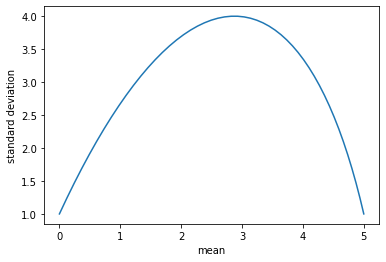

In [230]:
plt.plot(x,y)
plt.xlabel('mean')
plt.ylabel('standard deviation')

In [234]:
x = np.linspace(-20,20,100)


In [238]:
vect_means = np.array([0,2,4,5])
vect_var = np.array([1,1/5,5,1])

In [239]:
N = 50
interp_means = Bezier_interpolation(vect_means,N)

interp_var = Bezier_interpolation(vect_var,N)

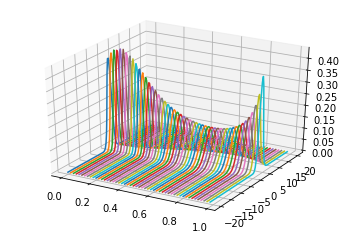

In [240]:
fig = plt.figure()

ax = plt.axes(projection='3d')

for i in range(N):
  t = i/N*np.ones(100)
  y = normal(x,interp_means[i],interp_var[i])
  ax.plot3D(t,x,y)#,label = 'time {}'.format(i))
  #plt.legend()

plt.show()